In [33]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils.video import VideoStream
from imutils import face_utils
from threading import Thread
import numpy as np
import argparse
import imutils
import time
import dlib
import cv2
import matplotlib.pyplot as plt

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
from scipy.spatial import distance


In [35]:
from scipy.spatial import distance as dist 
def eye_aspect_ratio(eye):
    # Vertical eye landmarks
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    # Horizontal eye landmarks 
    C = dist.euclidean(eye[0], eye[3])

    # The EAR Equation 
    EAR = (A + B) / (2.0 * C)
    return EAR

def final_ear(shape):
    (lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
    (rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

    leftEye = shape[lStart:lEnd]
    rightEye = shape[rStart:rEnd]

    leftEAR = eye_aspect_ratio(leftEye)
    rightEAR = eye_aspect_ratio(rightEye)

    ear = (leftEAR + rightEAR) / 2.0
    return (ear, leftEye, rightEye)

In [36]:
def lip_distance(shape):
    top_lip = shape[50:53]
    top_lip = np.concatenate((top_lip, shape[61:64]))

    low_lip = shape[56:59]
    low_lip = np.concatenate((low_lip, shape[65:68]))

    top_mean = np.mean(top_lip, axis=0)
    low_mean = np.mean(low_lip, axis=0)

    distance = abs(top_mean[1] - low_mean[1])
    return 

In [23]:
from scipy.spatial import distance as dist 
def mouth_aspect_ratio(mouth):
    # compute the euclidean distances between the two sets of
    # vertical mouth landmarks (x, y)-coordinates
    A = dist.euclidean(mouth[2], mouth[10]) # 51, 59
    B = dist.euclidean(mouth[4], mouth[8]) # 53, 57

    # compute the euclidean distance between the horizontal
    # mouth landmark (x, y)-coordinates
    C = dist.euclidean(mouth[0], mouth[6]) # 49, 55

    # compute the mouth aspect ratio
    mar = (A + B) / (2.0 * C)

    # return the mouth aspect ratio
    return mar

In [22]:
# Grab the indexes of the facial landamarks for the left and right eye respectively 
(lstart, lend) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rstart, rend) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]
(mstart, mend) = face_utils.FACIAL_LANDMARKS_IDXS["mouth"]

In [24]:
cap = cv2.VideoCapture(0)
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")


In [47]:
img1 = cv2.imread("C:/Users/ACER/OneDrive - Universitas Airlangga/KULIAH/semester 5/bbb data mining/final_project/final-project-datmin2/images/awake/awake.441b022a-6f99-11ed-ab2d-fc4482a2ef62.jpg")[:, :, ::-1]
img2 = cv2.imread("C:/Users/ACER/OneDrive - Universitas Airlangga/KULIAH/semester 5/bbb data mining/final_project/final-project-datmin2/images/drowsy/drowsy.66b2abea-6f9c-11ed-8c6a-fc4482a2ef62.jpg")[:, :, ::-1]
img3 = cv2.imread("C:/Users/ACER/OneDrive - Universitas Airlangga/KULIAH/semester 5/bbb data mining/final_project/final-project-datmin2/images/drowsy/drowsy.66b2abea-6f9c-11ed-8c6a-fc4482a2ef62.jpg")[:, :, ::-1]
MOUTH_AR_THRESH = 0.2


In [56]:
img1 = cv2.imread("C:/Users/ACER/OneDrive - Universitas Airlangga/KULIAH/semester 5/bbb data mining/final_project/final-project-datmin2/images/awake/awake.441b022a-6f99-11ed-ab2d-fc4482a2ef62.jpg")[:, :, ::-1]
img2 = cv2.imread("C:/Users/ACER/OneDrive - Universitas Airlangga/KULIAH/semester 5/bbb data mining/final_project/final-project-datmin2/images/drowsy/drowsy.66b2abea-6f9c-11ed-8c6a-fc4482a2ef62.jpg")[:, :, ::-1]
img3 = cv2.imread("C:/Users/ACER/OneDrive - Universitas Airlangga/KULIAH/semester 5/bbb data mining/final_project/final-project-datmin2/images/drowsy/drowsy.66b2abea-6f9c-11ed-8c6a-fc4482a2ef62.jpg")[:, :, ::-1]
MOUTH_AR_THRESH = 0.2
# (mStart, mEnd) = (49, 68)


for idx, img in enumerate([img3]):
#     (mstart, mend) = (49, 68)
    image = img.copy()
    image = np.ascontiguousarray(image)
    imgH, imgW, _ = image.shape

#     # Creating a copy of the original image for plotting the EAR value
#     custom_chosen_lmk_image = image.copy()
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect faces in the grayscale frame
    rects = detector(gray, 0)

    # loop over the face detections
    for rect in rects:
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # extract the mouth coordinates, then use the
        # coordinates to compute the mouth aspect ratio
        mouth = shape[mstart:mend]

        marr = lip_distance(shape)
        
        mouthMAR = mouth_aspect_ratio(mouth)
        mar = mouthMAR
        # compute the convex hull for the mouth, then
        # visualize the mouth
        mouthHull = cv2.convexHull(mouth)

        cv2.drawContours(image, [mouthHull], -1, (0, 255, 0), 1)
        cv2.putText(image, "MAR: {:.2f}".format(mar), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

#         # Draw text if mouth is open
#         if mar > MOUTH_AR_THRESH:
#             cv2.putText(image, "Mouth is Open!", (30,60),
#             cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)

#         if mar > MOUTH_AR_THRESH:
#             label = 'DROWSY'
#             cv2.putText(image, #image
#                     f"MAR: {round(mar, 4)} DROWSY", #text
#                     (1, 24), #coordinate x n y
#                     cv2.FONT_HERSHEY_SIMPLEX, #font
#                     0.5, #font scale
#                     (255, 0, 0), #font colour
#                     2)  #thickness
#         elif mar <= MOUTH_AR_THRESH:
#             label = 'AWAKE'
#             cv2.putText(image, #image
#                     f"MAR: {round(mar, 4)} AWAKE", #text
#                     (1, 24), #coordinate x n y
#                     cv2.FONT_HERSHEY_SIMPLEX, #font
#                     0.5, #font scale
#                     (255, 255, 255), #font colour
#                     2)  #thickness
        plt.imshow(image)
        plt.title(label, fontsize=18)
        plt.axis("off")
        plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

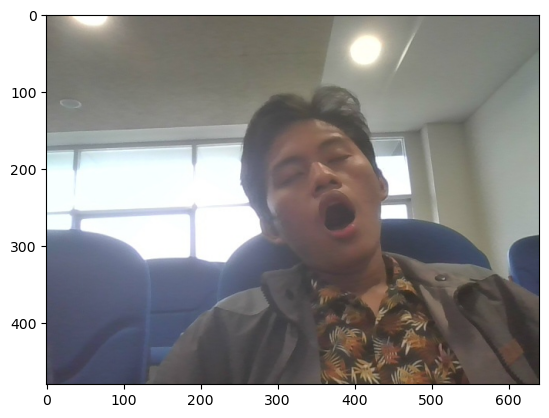

In [50]:
plt.imshow(img3)
plt.show

In [57]:
p = img3
gray = cv2.cvtColor(p, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)
shape = predictor(gray, rect)
shape = face_utils.shape_to_np(shape)
mouth = shape[mstart:mend]
mouthMAR = mouth_aspect_ratio(mouth)
mar = mouthMAR
print(mar)

marr = lip_distance(shape)
print(marr)

0.6380276026230327
None


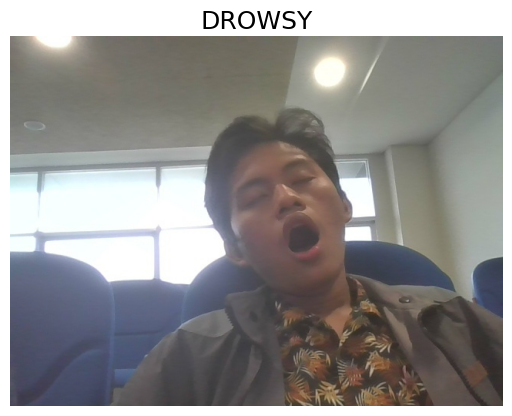

In [61]:
plt.imshow(p)
plt.title(label, fontsize=18)
plt.axis("off")
plt.show()